In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2)

In [8]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(data_X, class_label, test_size=0.2, random_state=1)

In [9]:
# fir the model on train data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# predict probabilities for the test data
probs = model.predict_proba(X_test)

In [12]:
# keep probabilities of the positive class only
probs = probs[:,1]

In [13]:
# compute the auc score
auc = roc_auc_score(y_test, probs)
print("AUC : %.2f"%auc)

AUC : 0.96


In [15]:
# defining a function to plot the roc curve
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Receiver Operating Characteristics Curve')
    plt.legend()
    plt.show()

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

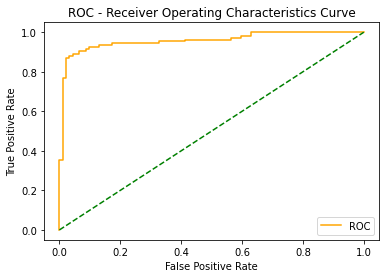

In [19]:
# plot ROC using user-defined method
plot_roc_curve(fpr, tpr)

In [20]:
from sklearn.metrics import precision_recall_curve

In [21]:
precision, recall, thresholds = precision_recall_curve(y_test,probs)

In [27]:
def plot_prc_curve(precision, recall):
    plt.plot(recall, precision, color='blue', label='PRC')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PRC Curve')
    plt.legend()
    plt.show()

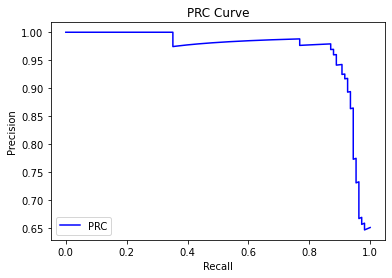

In [28]:
plot_prc_curve(precision, recall)